In [90]:
pip install ucimlrepo matplotlib scikit-learn seaborn numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [91]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
  
# metadata 
print(heart_failure_clinical_records.metadata) 
  
# variable information 
print(heart_failure_clinical_records.variables) 

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

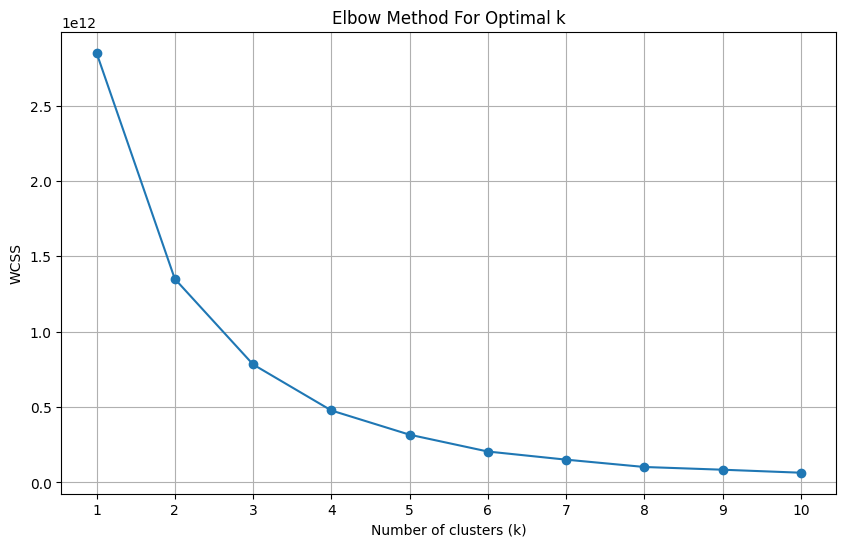

In [92]:
# elbow method to find optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Within Cluster Sum of Squares
# find the value of k where the decrease in WCSS starts to slow down (the "elbow")
wcss = []

# range of k to test
k_range = range(1, 11)

# calculate WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()


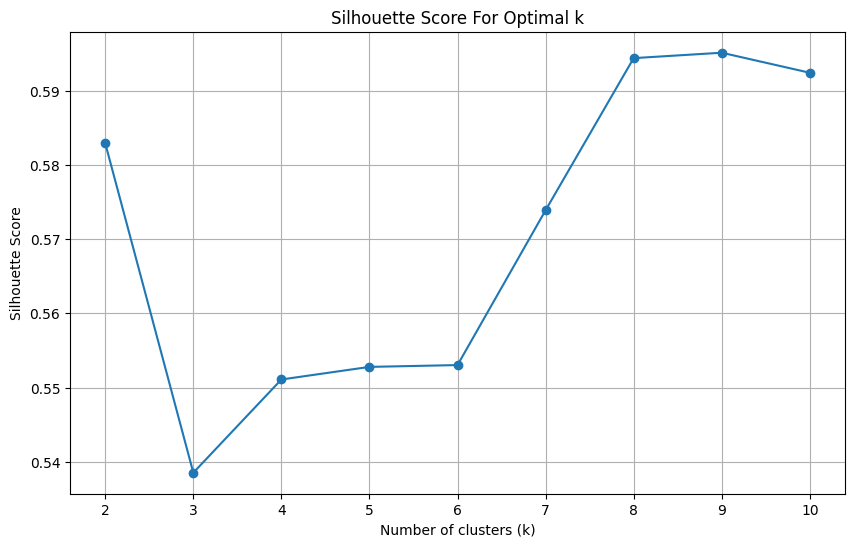

In [93]:
# silhouette score to validate optimal number of clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []

# range of k to test
k_range = range(2, 11)

# calculate silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', max_iter=300)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    #print(f'For n_clusters = {k}, silhouette score is {score}')

# plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

c:\Users\slvtr\Desktop\progetto_cluster\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


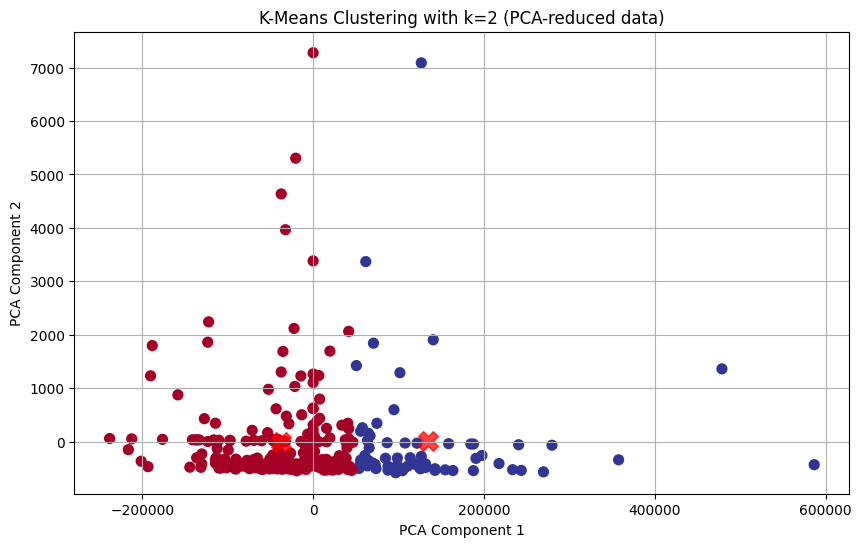

In [94]:

# applying k-means with k=2 and plot clusters after reducing to 2D with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  


kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto', max_iter=300)
y_kmeans = kmeans.fit_predict(X)

# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering with k=2 (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

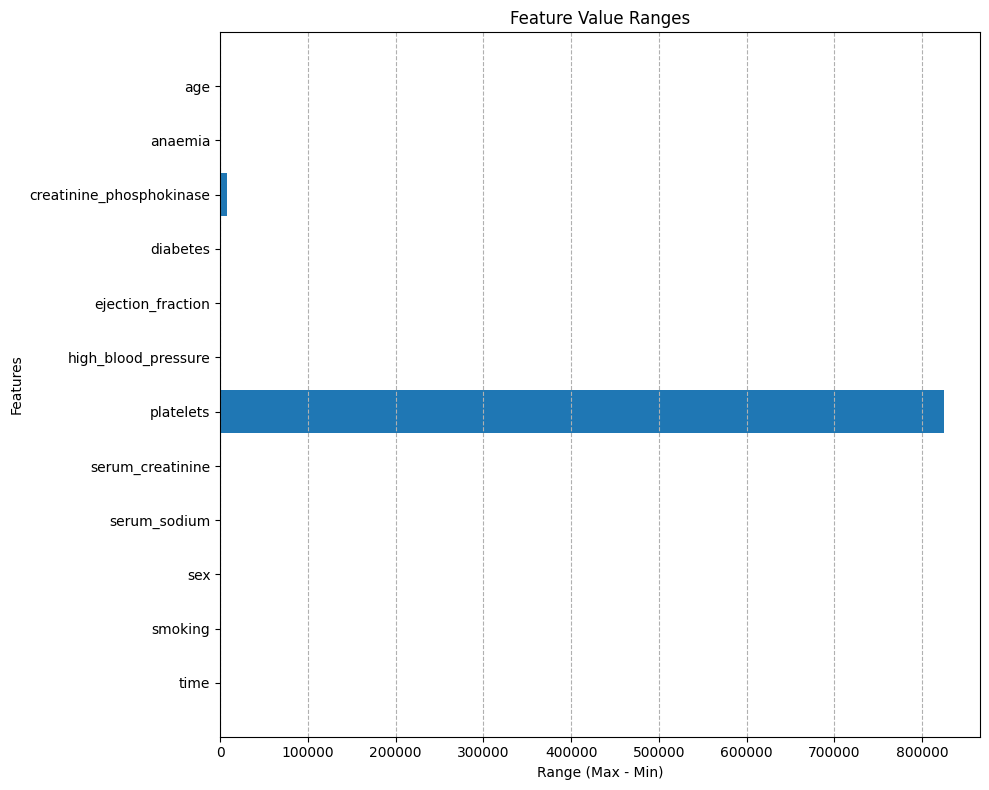

In [95]:
# plot feature range of values with bar plot

# calculate range for each feature with max - min
feature_ranges = X.max() - X.min()

features = feature_ranges.index.tolist()
ranges = feature_ranges.values

plt.figure(figsize=(10, 8))
plt.barh(features, ranges) 

plt.title('Feature Value Ranges')
plt.xlabel('Range (Max - Min)')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--')
plt.tight_layout() 
plt.show()


## Feature are too unbalanced as some are continuos and other booleans

## Solution: scale values

In [96]:
# scaling features before clustering with StandardScaler
from sklearn.preprocessing import StandardScaler

# we keep a copy of original data 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
X_original = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

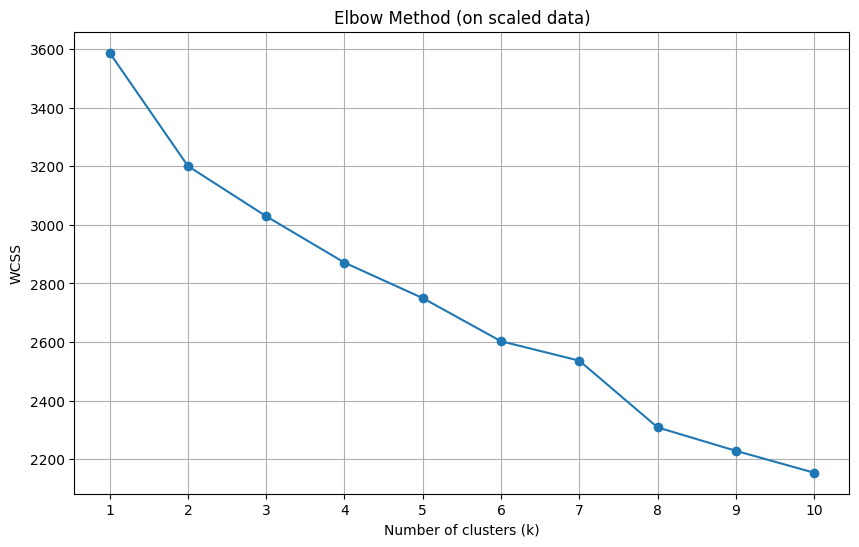

In [97]:
# elbow method on scaled data to find optimal number of clusters

# Within Cluster Sum of Squares
# find the value of k where the decrease in WCSS starts to slow down (the "elbow")
wcss = []
k_range = range(1, 11)

# calculate WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_)

# plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method (on scaled data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

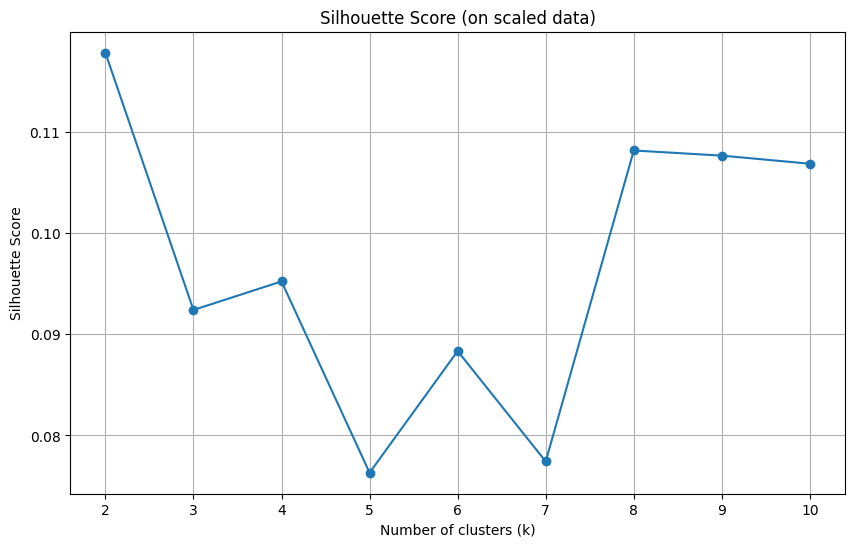

In [98]:
# silhouette score on scaled data to validate optimal number of clusters
silhouette_scores = []
k_range = range(2, 11) 

# calculate silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
    #print(f'For k = {k}, Silhouette Score is : {score:.4f}')

# plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score (on scaled data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

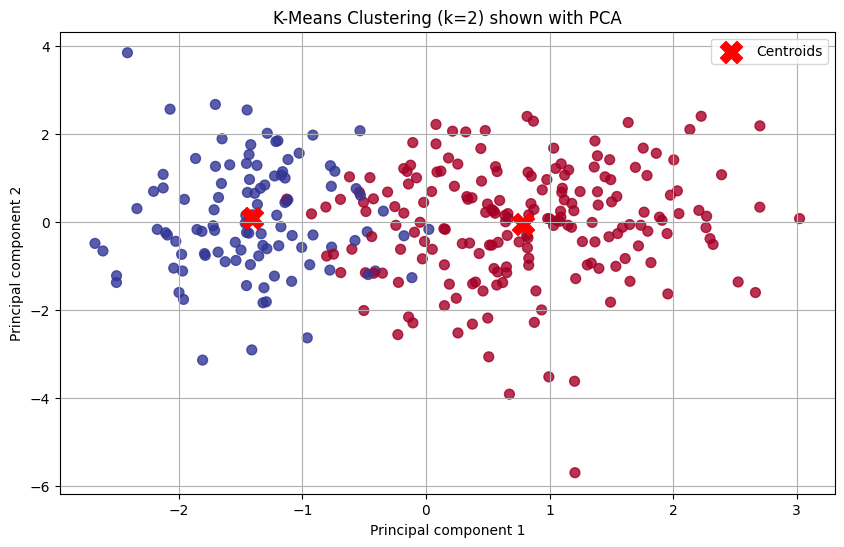

In [99]:
# applying k-means with optimal k on SCALED data and plot clusters after reducing to 2D with PCA
from sklearn.decomposition import PCA

OPTIMAL_K = 2 

# dimensionality reduction on SCALED data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# apply K-Means on SCALED data
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X_scaled)

# show clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='RdYlBu', alpha=0.8)
centers_scaled = kmeans.cluster_centers_
centers_pca = pca.transform(centers_scaled)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=250, marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={OPTIMAL_K}) shown with PCA')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.grid(True)
plt.show()

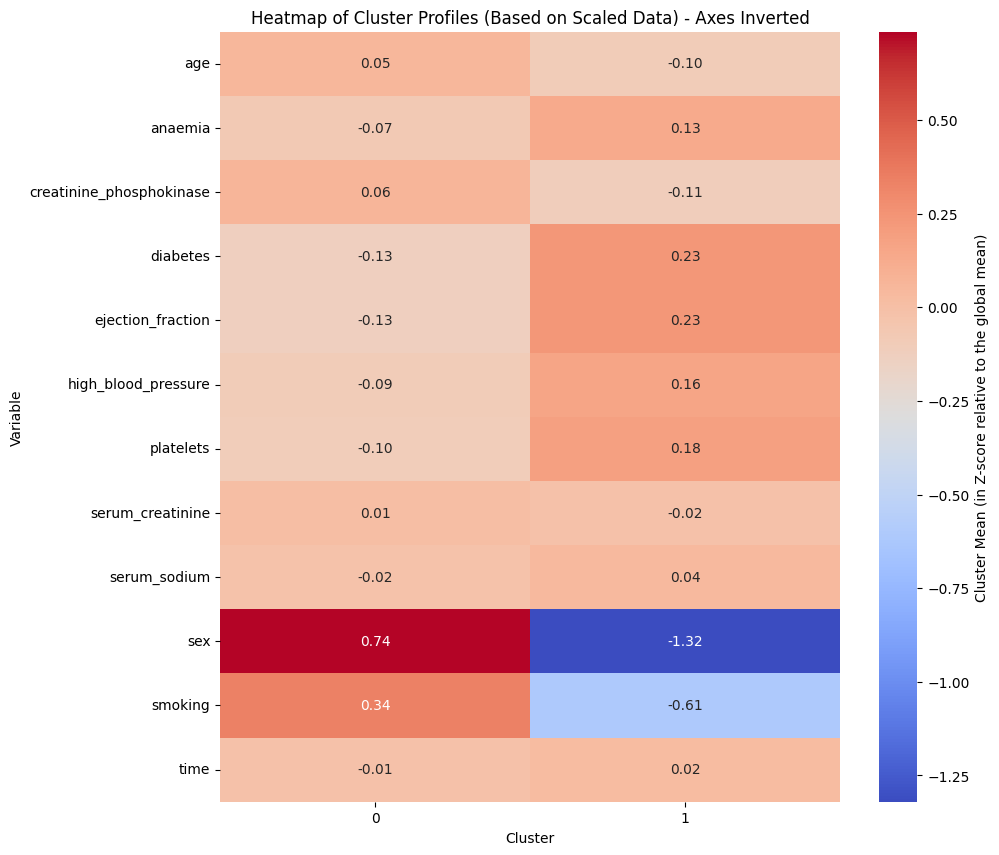

In [100]:
# plot heatmap of cluster profiles based on SCALED data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_analysi_scaled = pd.DataFrame(X_scaled, columns=X_original.columns)
X_analysi_scaled['cluster'] = y_kmeans

# compute the means for each cluster using the SCALED values, the resulting means directly represent the Z-score profiles
scaled_means = X_analysi_scaled.groupby('cluster').mean()

# generate the Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(
    scaled_means.T, 
    annot=True,       
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={'label': 'Cluster Mean (in Z-score relative to the global mean)'}
)
plt.title('Heatmap of Cluster Profiles (Based on Scaled Data) - Axes Inverted')
plt.ylabel('Variable')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

## Cluster 0 is characterized mainly by smokers men
## Cluster 1 is characterized mainly by non-smokers women 

In [101]:
# add cluster labels to original dataframe
X['cluster'] = y_kmeans

In [102]:
# Detailed statistics for each cluster
groups= X_analysi_scaled.groupby('cluster')

# distinguish between continuous and binary variables
for name, group in groups:
    print(f"Cluster {name}:")
    # for continuous variables show mean, std, median
    print(group.agg({
            'age': ['mean', 'std', 'median'],
            'creatinine_phosphokinase': ['mean', 'std', 'median'],
            'ejection_fraction': ['mean', 'std', 'median'],
            'platelets': ['mean', 'std', 'median'],
            'serum_creatinine': ['mean', 'std', 'median'],
            'serum_sodium': ['mean', 'std', 'median'],
            'time': ['mean', 'std', 'median'],
            
        }))
    # for binary variables, mean represent the proportions, count shows total count in cluster
    print(group.agg({
            'anaemia': ['mean', 'count'], 
            'diabetes': ['mean', 'count'],
            'high_blood_pressure': ['mean', 'count'],
            'sex': ['mean', 'count'],
            'smoking': ['mean', 'count'],
        }))

Cluster 0:
             age  creatinine_phosphokinase  ejection_fraction  platelets  \
mean    0.053755                  0.063548          -0.129625  -0.101238   
std     1.029721                  1.155911           0.926383   0.967349   
median -0.070223                 -0.343607          -0.260991  -0.111204   

        serum_creatinine  serum_sodium      time  
mean            0.010162     -0.023742 -0.011903  
std             0.961252      0.941292  1.006757  
median         -0.284552      0.085034 -0.164690  
          anaemia    diabetes  high_blood_pressure         sex     smoking
mean    -0.071889   -0.129538            -0.091925    0.735688    0.338618
count  192.000000  192.000000           192.000000  192.000000  192.000000
Cluster 1:
             age  creatinine_phosphokinase  ejection_fraction  platelets  \
mean   -0.096457                 -0.114030           0.232599   0.181661   
std     0.946332                  0.626705           1.090576   1.040546   
median -0.070223

In [103]:
# differentiate variable types for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# continuous variables (to be visualized with Boxplots)
continuous_vars = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction',
    'platelets', 'serum_creatinine', 'serum_sodium', 'time'
]

# binary variables (to be visualized with Bar Plots of proportions)
binary_vars = [
    'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'
]

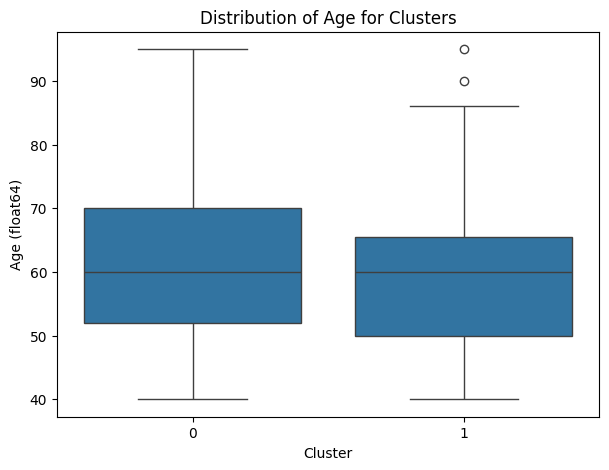

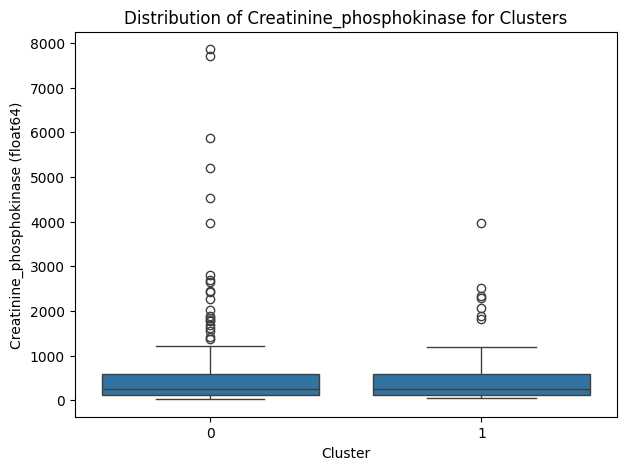

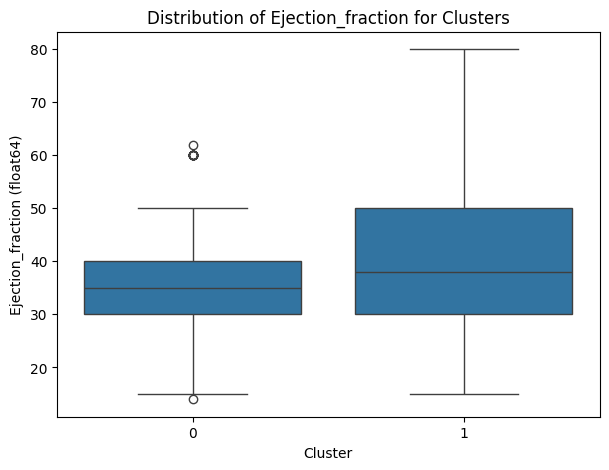

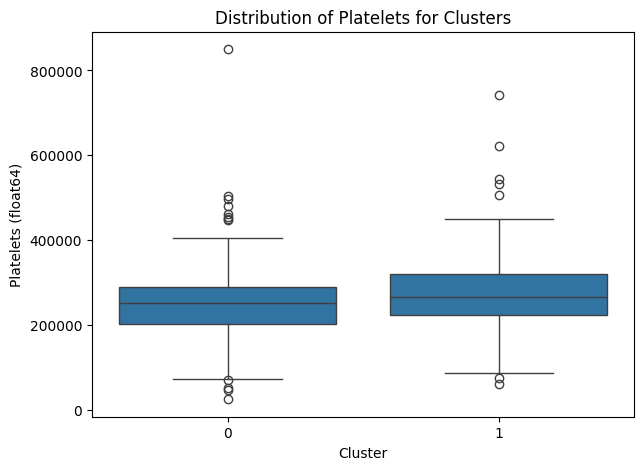

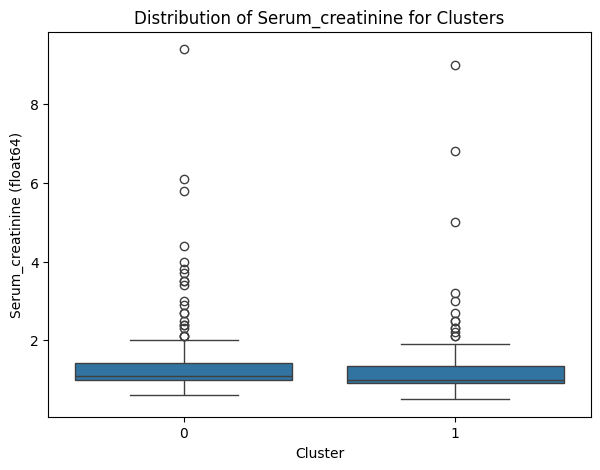

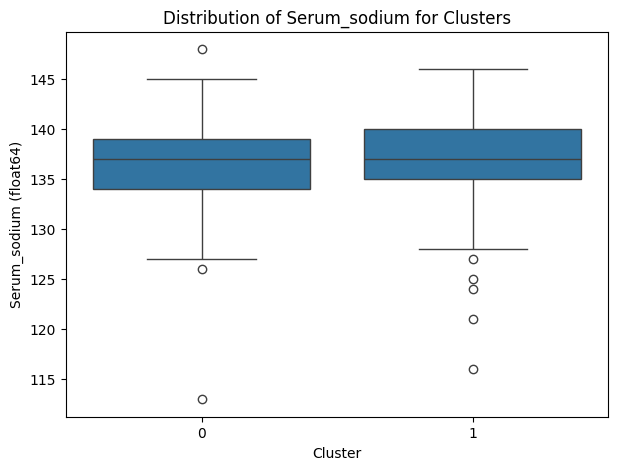

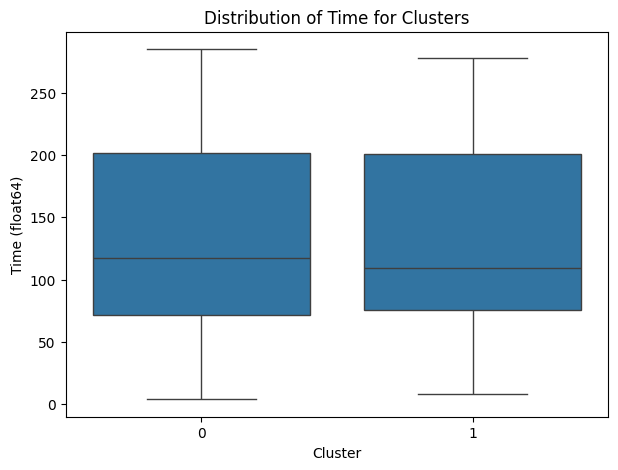

In [104]:
# Boxplots for continuous variables
for col in continuous_vars:
    plt.figure(figsize=(7, 5))
    # plotting using original data to reflect actual distributions
    sns.boxplot(x='cluster', y=col, data=X)
    plt.title(f'Distribution of {col.capitalize()} for Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(f'{col.capitalize()} ({X_analysi_scaled[col].dtype})')
    plt.show()

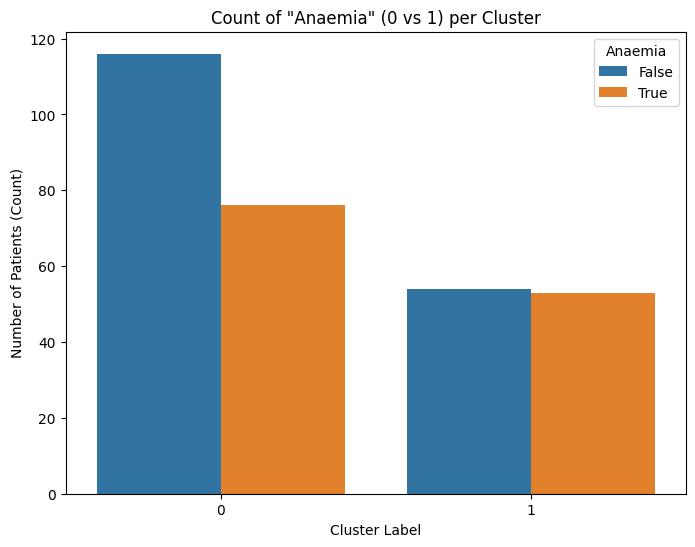

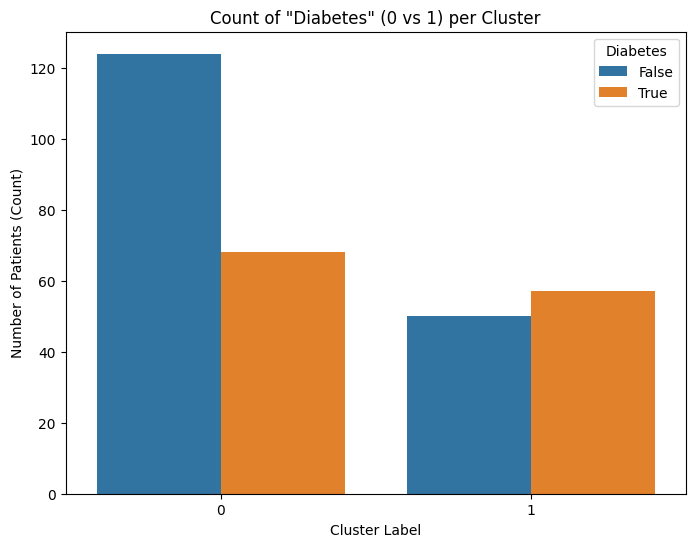

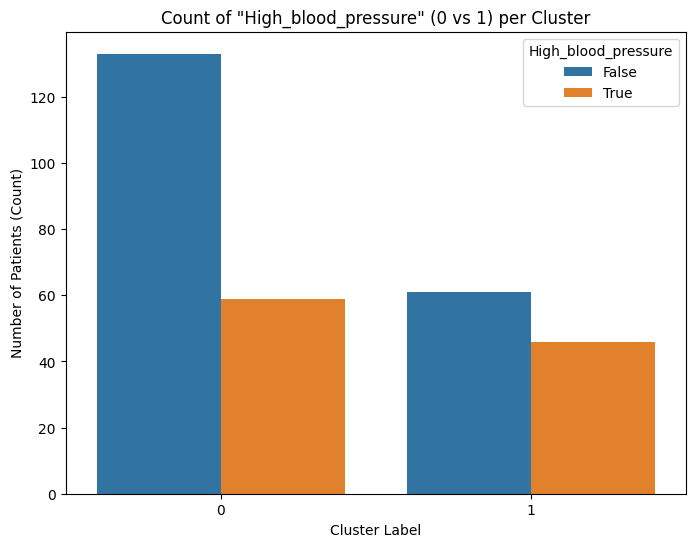

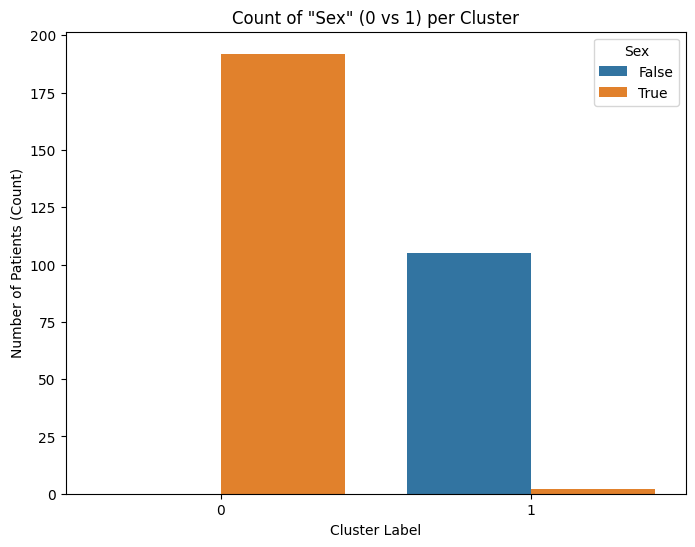

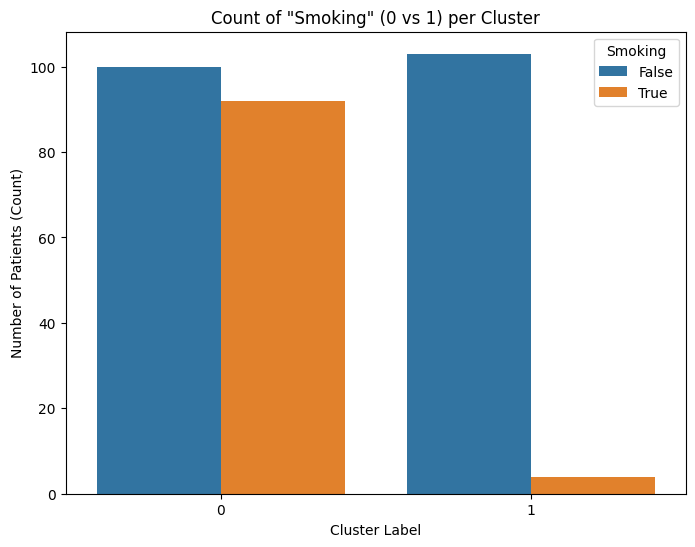

In [105]:
# Bar Plots for binary variables, showing counts for 0 and 1 values in each cluster
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for col in binary_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=X, x='cluster', hue=col)
    plt.title(f'Count of "{col.capitalize()}" (0 vs 1) per Cluster')
    plt.xlabel('Cluster Label')
    plt.ylabel('Number of Patients (Count)')
    plt.legend(title=col.capitalize(), labels=['False', 'True'])
    
    plt.show()

## The original dataset is not well balanced 

In [106]:
# Statistical tests to compare clusters (Cluster 0 vs Cluster -1)
import pandas as pd
from scipy import stats

# separate the two groups we want to compare
cluster_0 = X[X['cluster'] == 0]
cluster_1 = X[X['cluster'] == 1]

print("--- Tests for Continuous Variables ---")

for var in continuous_vars:
    print(f"\nAnalyzing variable: '{var}'")
    
    # Kruskal-Wallis
    stat_kw, p_value_kw = stats.kruskal(cluster_0[var], cluster_1[var])
        
    print(f"  Kruskal-Wallis: p-value = {p_value_kw:.4f}")
    if p_value_kw < 0.05:
        print("  -> The difference between the distributions is statistically significant (based on median).")
    else:
        print("  -> There is no statistically significant difference between the distributions (based on median).")

print("\n\n--- Tests for Binary Variables ---")

variabili_binarie = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for var in binary_vars:
    print(f"\nAnalyzing variable: '{var}'")
    contingency_table = pd.crosstab(X['cluster'], X[var])
    
    # Chi-squared test
    chi2, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)
    
    print(f"  Chi-squared: p-value = {p_value_chi2:.4f}")
    if p_value_chi2 < 0.05:
        print("  -> The association is statistically significant.")
    else:
        print("  -> There is no statistically significant association.")
        

--- Tests for Continuous Variables ---

Analyzing variable: 'age'
  Kruskal-Wallis: p-value = 0.2724
  -> There is no statistically significant difference between the distributions (based on median).

Analyzing variable: 'creatinine_phosphokinase'
  Kruskal-Wallis: p-value = 0.7074
  -> There is no statistically significant difference between the distributions (based on median).

Analyzing variable: 'ejection_fraction'
  Kruskal-Wallis: p-value = 0.0090
  -> The difference between the distributions is statistically significant (based on median).

Analyzing variable: 'platelets'
  Kruskal-Wallis: p-value = 0.0084
  -> The difference between the distributions is statistically significant (based on median).

Analyzing variable: 'serum_creatinine'
  Kruskal-Wallis: p-value = 0.2646
  -> There is no statistically significant difference between the distributions (based on median).

Analyzing variable: 'serum_sodium'
  Kruskal-Wallis: p-value = 0.1590
  -> There is no statistically significan

## We can see that **sex** is the most significant variables in distinguishing the two groups, followed by smoking, ejection_fraction, platelets, diabetes and high_blood_pressure.

## Some classification task

In [107]:
# add y labels to original dataframe: target variable is 0 for survival, 1 for death
X['target'] = y

--- Logistic Regression ---
Model Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



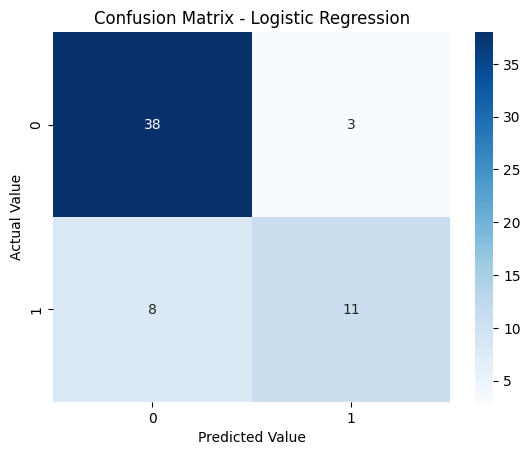

In [108]:
# Classification task to predict 'target' using Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training 
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train.values.ravel())

# Prediction and Evaluation
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Print the results
print("--- Logistic Regression ---")
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()


--- Random Forest ---
Model Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



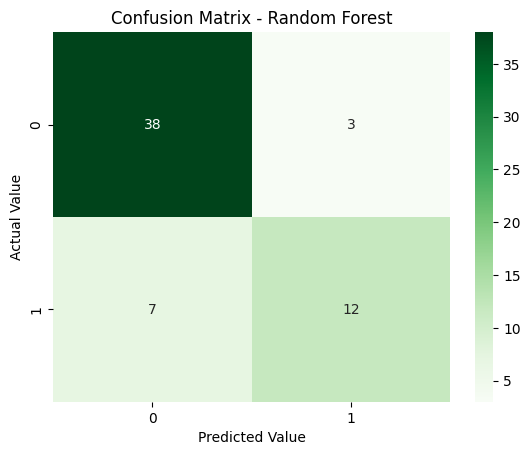


Feature Importances according to Random Forest:
                          importance
time                        0.361383
serum_creatinine            0.154118
ejection_fraction           0.129121
platelets                   0.076820
age                         0.076779
creatinine_phosphokinase    0.074548
serum_sodium                0.066215
diabetes                    0.013931
high_blood_pressure         0.013373
sex                         0.011312
anaemia                     0.011203
smoking                     0.011198


In [109]:
# Classification task to predict 'target' using Random Forest

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Model Training
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train.values.ravel())

# Prediction and Evaluation
y_pred_rf = rf_clf.predict(X_test_scaled)

# Print the results
print("\n--- Random Forest ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# Analysis of Feature Importances
feature_importances = pd.DataFrame(
    rf_clf.feature_importances_,
    index = X_original.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

print("\nFeature Importances according to Random Forest:")
print(feature_importances)